# 5.2 ImageDataGenerator によるデータ拡張処理 p.278

## データの拡張処理を行う ImageDataGenerator

<code>
tf.keras.preprocessing.Image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    bridhtness_range=None,
    shear-range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cva=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None
    )
</code>

<code>
kf.keras.preprocessing.Image.ImageDataGenerator.flow(
    x,
    y=None,
    batch_size=32,
    shuffle=True,
    sample_weight=None,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    subset=None
    )
</code>

## CIFAR-10 を読み込んでカラー画像を出力する

In [1]:
# 5-02-1 CIFAR-10 の画像をカテゴリごとに10枚ずつランダムに抽出する
# p.282
from tensorflow.keras import datasets

(x_train, t_train), (x_test, t_test) = datasets.cifar10.load_data()
print(f'x_train: {x_train.shape}   t_train: {t_train.shape}')
print(f'x_test: {x_test.shape}  t_test: {t_test.shape}')

170508288/170498071 [==============================] - 6s 0us/step
x_train: (50000, 32, 32, 3)   t_train: (50000, 1)
x_test: (10000, 32, 32, 3)  t_test: (10000, 1)


In [2]:
# [自分へのメモ]　各クラスごとの画像を集めるのに独自のコードを使うことにする。
# indices[0]: airplaneの画像のindexのリスト
# indices[1]: automobileの画像のindexのリスト
# ...
# indices[9]: truckの画像のindexのリスト

indices = [[] for i in range(10)]

for idx, cl in enumerate(t_train):
    if (idx < 5):
        print(f'idx: {idx}  cl: {cl}')
    indices[cl[0]].append(idx)

idx: 0  cl: [6]
idx: 1  cl: [9]
idx: 2  cl: [9]
idx: 3  cl: [4]
idx: 4  cl: [1]


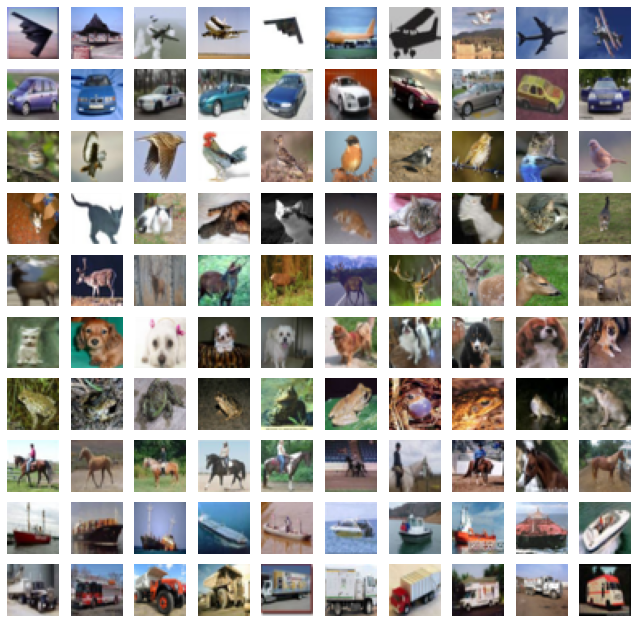

In [3]:
# [自分へのメモ] 各クラスごとに10枚ずつ画像を表示する

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

W = 2.8 * 0.4
n_samples = 10
n_classes = 10

fig, ax = plt.subplots(n_classes, n_samples, figsize=(W*n_samples, W*n_classes))
for row in range(n_classes):
    ids = np.random.choice(indices[row], n_samples)
    for col in range(n_samples):
        id = ids[col]
        ax[row][col].imshow(x_train[id])
        ax[row][col].axis('off')
plt.show()
        

## ImageDataGenerator で加工処理してみる p.286


In [4]:
# 5-02-2 サンプルデータの用意
# p.286

from tensorflow.keras import datasets

(x_train, t_train), (x_test, t_test) = datasets.cifar10.load_data()

x_train = x_train / 255.0

batch_size = 32

In [5]:
# 5-02-3 描画を行う関数
# p.286
# [自分へのメモ] 独自のコードに変更した

%matplotlib inline
import matplotlib.pyplot as plt

def draw(x):
    W = 2.8 * 0.5
    n_cols = 8
    n_rows = (len(x) + n_cols -1) // n_cols
    fig, ax = plt.subplots(n_rows, n_cols, figsize=(W * n_cols, W * n_rows))
    for i in range(n_rows * n_cols):
        row = i // n_cols
        col = i % n_cols
        if (i < len(x)):
            ax[row][col].imshow(x[i])
        ax[row][col].axis('off')
    plt.show()

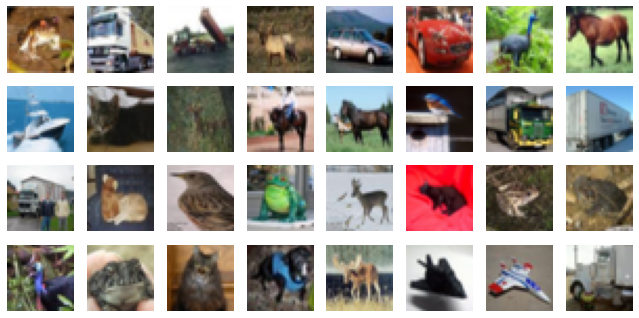

In [6]:
# 5-02-4 オリジナルの画像を表示する
# p.287

draw(x_train[0:batch_size])

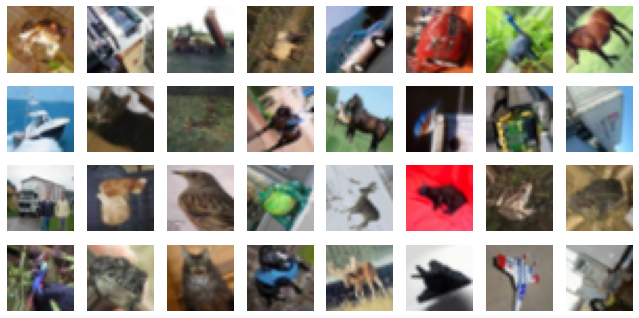

In [7]:
# 5-02-5 画像をランダムに回転する
# p.288

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=90)
g = datagen.flow(x_train, t_train, batch_size, shuffle=False)

x_batch, t_batch = g.next()

draw(x_batch)

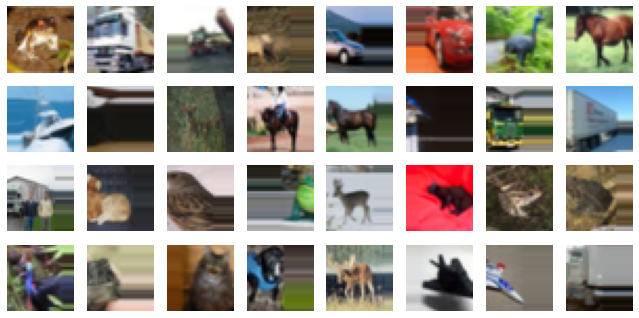

In [8]:
# 5-02-6 平行移動
# p.289

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range=0.5)
g = datagen.flow(x_train, t_train, batch_size, shuffle=False)

x_batch, t_batch = g.next()

draw(x_batch)

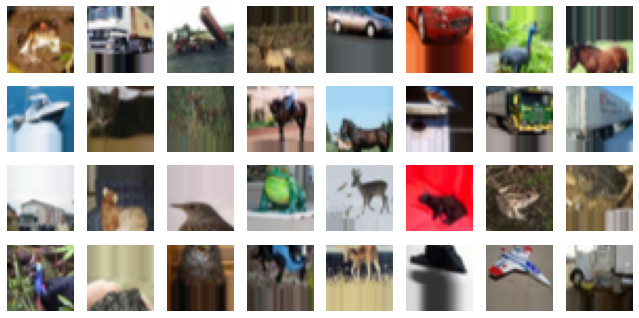

In [9]:
# 5-02-7 垂直移動
# p.290

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(height_shift_range=0.5)
g = datagen.flow(x_train, t_train, batch_size, shuffle=False)

x_batch, t_batch = g.next()

draw(x_batch)

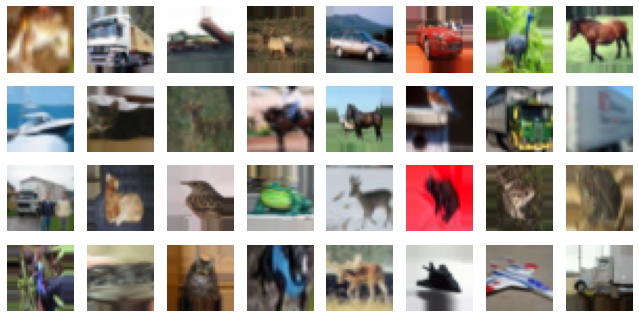

In [10]:
# 5-02-8 拡大
# p.291

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.5)
g = datagen.flow(x_train, t_train, batch_size, shuffle=False)

x_batch, t_batch = g.next()

draw(x_batch)

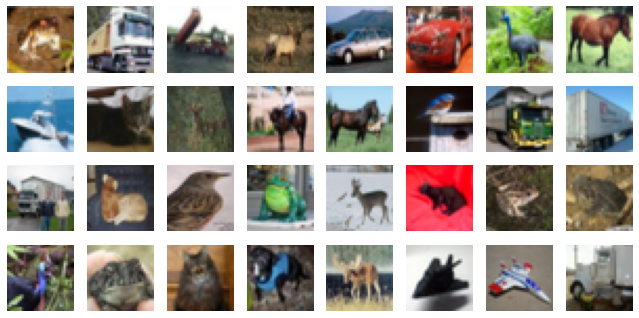

In [11]:
# 5-02-9 左右をランダムに反転
# p.292

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(horizontal_flip=True)
g = datagen.flow(x_train, t_train, batch_size, shuffle=False)

x_batch, t_batch = g.next()

draw(x_batch)

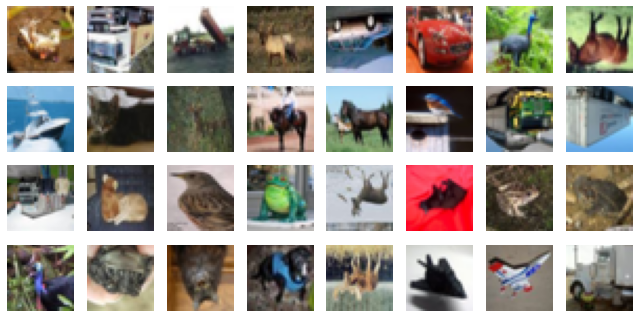

In [12]:
# 5-02-10 上下をランダムに反転
# p.293

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(vertical_flip=True)
g = datagen.flow(x_train, t_train, batch_size, shuffle=False)

x_batch, t_batch = g.next()

draw(x_batch)

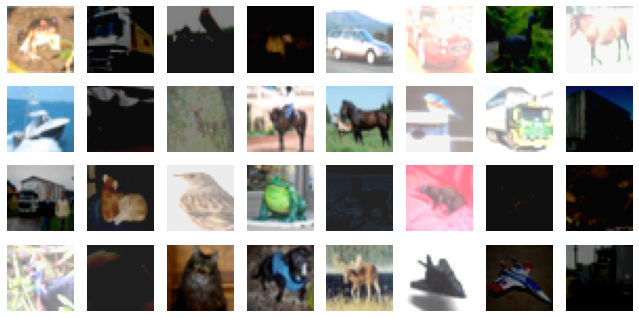

In [13]:
# 5-02-11 画像のチャネルをランダムにシフト
# p.292

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(channel_shift_range=0.7)
g = datagen.flow(x_train, t_train, batch_size, shuffle=False)

x_batch, t_batch = g.next()

draw(x_batch)